# radial basis function neural networks(RBFNNs)

In [1]:
%matplotlib inline 
from IPython.core.display import display

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
import numpy as np
import pandas as pd
from sympy import *
from sympy.utilities.lambdify import lambdify
import matplotlib.figure
init_printing()
#from math import *
from interval import interval, inf
from interval import imath
import sys
from pprint import pprint
import datetime
import os

In [2]:
! echo '' > find_all_solution.out
from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk

## $NN(x_1, x_2) = exp(-4(x_1 - 1)^2  -  6(x_2 - 0.5)^2) + exp(-7(x_1+1.5)^2 - 9(x_2+1)^2)$
where $x_1 \in [-2,2], x_2 \in [-2,2]$

### グラフの可視化

In [5]:
x_1, x_2, x_3 = var("x_1 x_2 x_3")
f_expr = exp(-4*(x_1-1)**2 - 6*(x_2-0.5)**2) + exp(-7*(x_1+1.5)**2 - 9*(x_2+1)**2)
f_expr = - f_expr

args = (x_1, x_2)
f_func = lambdify(args, f_expr, modules=imath)
f = fmat([[f_func]])

In [8]:
args_list =  np.array([X.flatten(), Y.flatten()]).T[:, :, np.newaxis]
args_list[0]

array([[-2.],
       [-2.]])

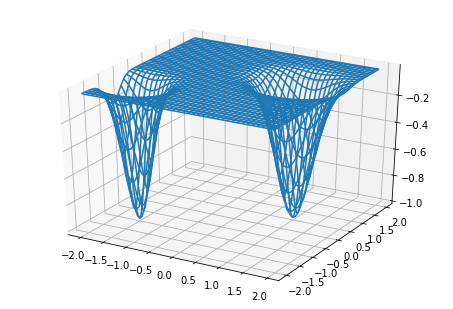

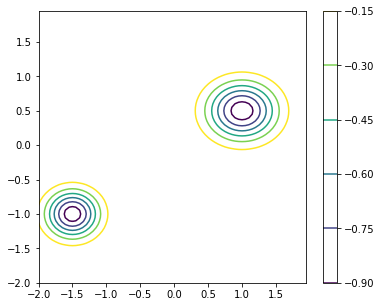

In [4]:
x = np.arange(-2, 2, 0.05) 
y = np.arange(-2, 2, 0.05) 

X, Y = np.meshgrid(x, y)
args_list =  np.array([X.flatten(), Y.flatten()]).T[:, :, np.newaxis]
Z = np.array([ip.mid(f(_args))[0][0] for _args in args_list]).reshape(X.shape)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z) 
plt.show()

fig = plt.figure(figsize=(6, 5))
im =plt.contour(X, Y, Z, shading='gouraud')
fig.colorbar(im)

### Krawczyk method

In [5]:
df_expr = [diff(f_expr, x) for x in args]
df_list = [[lambdify(args, _df_expr, modules=imath)] for _df_expr in df_expr]
df = fmat(df_list)

ddf_expr = [[diff(_df_expr, x) for x in args] for _df_expr in df_expr]
ddf_list = [[lambdify(args, _ddf_expr, modules=imath) for _ddf_expr in _row] for _row in ddf_expr]
ddf = fmat(ddf_list)

#### 自動微分 

----f-----


[[<function interval.imath.<lambda>>]]


----df----


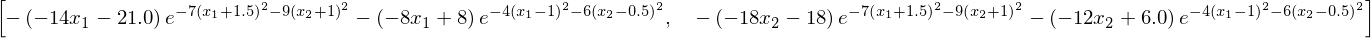


-----ddf-----


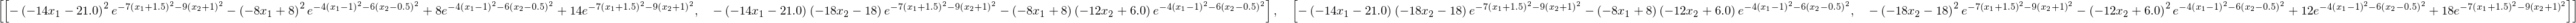

In [6]:
print '----' + 'f' + '-----'
display(f)
print
print '----' + 'df' + '----'
display(df_expr)
print
print '-----' + 'ddf' + '-----'
display(ddf_expr)
print
# print '-----' + 'X' + '-------'
# pprint(X)
# print

#### 全解探索

In [7]:
x_1 = interval[-2, 2.2]
x_2 = interval[-2, 2.2]


X = ip([[x_1],[x_2]])


kra = Krawczyk(df, ddf, X)

cnt_max = 2000
max_width = 1e-4
ans_boxes, S_num_list, T_num_list, U_num_list, animation_box = kra.find_global_minimum(f, trace=False, cnt_max=cnt_max, max_width=max_width)

# ans_boxes, S_num_list, T_num_list, U_num_list, animation_box = kra.find_global_minimum(
#     f, tmp_min_sup=f_val[0][0][0].sup ,trace=False, cnt_max=cnt_max, max_width=max_width)

# ans_boxes, S_num_list, T_num_list, U_num_list, animation_box = kra.find_all_solution(
#     trace=False, cnt_max=cnt_max, max_width=max_width)
print '#####'*10
pprint(ans_boxes)

Loop end. cnt:58, len(S):0, len(T):2, len(U):0

58
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT -----------
[[[interval([0.9277982209500776, 1.0637092973968394])],
  [interval([0.44121317423192297, 0.5624273235297641])]],
 [[interval([-1.5138329212540778, -1.4756061434849985])],
  [interval([-1.0208580194594878, -0.9543756476556472])]]]
##################################################
[[[interval([0.9999999999999998, 1.0000000000000002])],
  [interval([0.4999999999999999, 0.5000000000000001])]],
 [[interval([-1.5000000000000002, -1.4999999999999996])],
  [interval([-1.0000000000000002, -0.9999999999999998])]]]


## 探索の可視化

In [8]:
_NO_SOLUTIONS_FLAG = '_NO_SOLUTIONS_FLAG'
_NO_MINMUM_FLAG = '_NO_MINMUM_FLAG'
_EXACT_1_SOLUTION_FLAG = '_EXACT_1_SOLUTION_FLAG'
_MULTI_SOLUTIONS_FLAG = '_MULTI_SOLUTIONS_FLAG'  # less than 1 solution
_UNCLEAR_SOLUTION_FLAG = '_UNCLEAR_SOLUTION_FLAG'

# facecolor, edgecolor
color_map ={
    _NO_SOLUTIONS_FLAG: ("#bbbbbb", "#000000"),
    _NO_MINMUM_FLAG: ("#ffffbb", "#000000"),    
    _UNCLEAR_SOLUTION_FLAG:("#ffffff", "#000000" ),
    _EXACT_1_SOLUTION_FLAG: ("#00ffff", "#00ffff"),
}

def get_rect(x_1, x_2, facecolor_code, edgecolor_code):
    left, right, below, above = x_1[0][0], x_1[0][1], x_2[0][0], x_2[0][1]
    rect = Rectangle((left, below),
                    right - left,
                    above - below,
                    facecolor= facecolor_code,
                    edgecolor=edgecolor_code
                    )
    return rect


print 'len(animation_box): {}'.format(len(animation_box))
x1_lim = animation_box[0][0][0][0][0][0]
x2_lim = animation_box[0][0][0][1][0][0]
print x1_lim
print x2_lim

len(animation_box): 58
(-2.0, 2.2)
(-2.0, 2.2)


KeyboardInterrupt: 

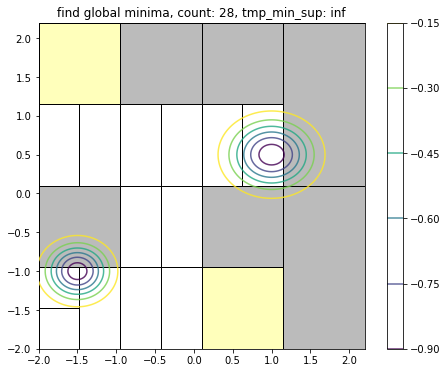

In [9]:
x = np.arange(-2, 2, 0.02) 
y = np.arange(-2, 2, 0.02) 
X, Y = np.meshgrid(x, y)
args_list =  np.array([X.flatten(), Y.flatten()]).T[:, :, np.newaxis]
Z = np.array([ip.mid(f(_args))[0][0] for _args in args_list]).reshape(X.shape)

now_string = "{0:%Y%m%d_%H%M%S}".format(datetime.datetime.now())
dirpath = 'image/{}'.format(now_string)
os.makedirs(dirpath)

for i in range(len(animation_box)):
#     if i % 7:
#         continue
        
    fig = plt.figure(figsize=(8,6))
    plt.axis('scaled')
    plt.title('find global minima, count: {}, tmp_min_sup: {}'.format(i, inf)) 
    plt.xlim(x1_lim)
    plt.ylim(x2_lim)
    ax = fig.add_subplot(111)
    for j in range(i+1):
        for parent_box, parent_flag in animation_box[j]:
#        parent_box, parent_flag = animation_box[j]
            fcolor, ecolor = color_map[parent_flag]# facecolor, edgecolor
            parent_x1 = parent_box[0][0]
            parent_x2 = parent_box[1][0]
            if ip.is_empty(parent_box):
                continue
            rect = get_rect(parent_x1, parent_x2, fcolor, ecolor)
            ax.add_patch(rect)
            
    # 最後にcolor mapを薄く重ねる    
    im =plt.contour(X, Y, Z, alpha=0.8, zorder=100, shading='gouraud')
    fig.colorbar(im)
    image_path = os.path.join(dirpath, "anime_{0:0>4}.png".format(i))
    fig.savefig(image_path)
    plt.close(fig)
    
print 'finish'

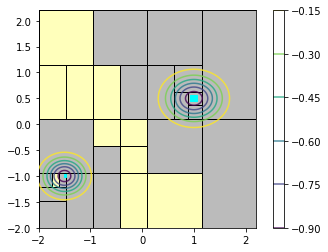

In [10]:
#最後の画像だけ表示

fig = plt.figure()
plt.axis('scaled')
plt.xlim(x1_lim)
plt.ylim(x2_lim)
ax = fig.add_subplot(111)
for j in range(len(animation_box)):
    for parent_box, parent_flag in animation_box[j]:
#        parent_box, parent_flag = animation_box[j]
        fcolor, ecolor = color_map[parent_flag]# facecolor, edgecolor
        parent_x1 = parent_box[0][0]
        parent_x2 = parent_box[1][0]
        if ip.is_empty(parent_box):
            continue
        rect = get_rect(parent_x1, parent_x2, fcolor, ecolor)
        ax.add_patch(rect)

# 最後にcolor mapを薄く重ねる    
im =plt.contour(X, Y, Z, alpha=0.8, zorder=100, shading='gouraud')
fig.colorbar(im)